# 1. Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import glob as gb
import cv2
import tensorflow as tf
import keras
import os
from sklearn.metrics import confusion_matrix


#2. Data Pre-Preocessing

**1. Importing Data**

In [ ]:
train_path = '/kaggle/input/intel-image-classification/seg_train/'
test_path = '/kaggle/input/intel-image-classification/seg_test/'
pred_path = '/kaggle/input/intel-image-classification/seg_pred/'

**2. Listing No.of Images Found in Each Folder**

In [ ]:
def open_folders(path, file, name = 'Traning Data'):
    for folder in os.listdir(path + file):
        files = gb.glob(pathname = path + file + '/' + folder + '/*.jpg')
        print(f'For {name} : Found {len(files)} images in folder {folder}')

print('-' * 40 + ' Traning Data ' + '-' * 46)
open_folders(train_path, 'seg_train')
print('\n' +'-' * 40 + ' Test Data ' + '-' * 50)
open_folders(test_path, 'seg_test', name = 'Test Data')
print('\n' +'-' * 40 + ' Prediction Data ' + '-' * 44)
files = gb.glob(pathname = pred_path + 'seg_pred' + '/*.jpg')
print(f'For Prediction Data : Found {len(files)} images in folder Prediction')

---------------------------------------- Traning Data ----------------------------------------------
For Traning Data : Found 2512 images in folder mountain
For Traning Data : Found 2382 images in folder street
For Traning Data : Found 2191 images in folder buildings
For Traning Data : Found 2274 images in folder sea
For Traning Data : Found 2271 images in folder forest
For Traning Data : Found 2404 images in folder glacier

---------------------------------------- Test Data --------------------------------------------------
For Test Data : Found 525 images in folder mountain
For Test Data : Found 501 images in folder street
For Test Data : Found 437 images in folder buildings
For Test Data : Found 510 images in folder sea
For Test Data : Found 474 images in folder forest
For Test Data : Found 553 images in folder glacier

---------------------------------------- Prediction Data --------------------------------------------
For Prediction Data : Found 7301 images in folder Prediction


**3. Checking the Size of Images**

In [ ]:
def get_image_size(path, folder_name):
    size = []
    if folder_name != 'seg_pred':
        for folder in os.listdir(path + folder_name):
            files = gb.glob(pathname = path + folder_name + '/' + folder + '/*.jpg')
            for file in files:
                image = plt.imread(file)
                size.append(image.shape)
    else:
        files = gb.glob(pathname = path + folder_name + '/*.jpg')
        for file in files:
            image = plt.imread(file)
            size.append(image.shape)

    print(pd.Series(size).value_counts())

print('-' * 40 + ' Traning Data ' + '-' * 46)
get_image_size(train_path, 'seg_train')
print('\n' +'-' * 40 + ' Test Data ' + '-' * 50)
get_image_size(test_path, 'seg_test')
print('\n' +'-' * 40 + ' Prediction Data ' + '-' * 44)
get_image_size(pred_path, 'seg_pred')


---------------------------------------- Traning Data ----------------------------------------------
(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(144, 150, 3)        2
(143, 150, 3)        2
(123, 150, 3)        2
(142, 150, 3)        2
(108, 150, 3)        2
(136, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(100, 150, 3)        1
(141, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(147, 150, 3)        1
(131, 150, 3)        1
(81, 150, 3)         1
(140, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(124, 150, 3)        1
(149, 150, 3)        1
(110, 150, 3)        1
(105, 150, 3)        1
(97, 150, 3)         1
(120, 150, 3)        1
(76, 150, 3)         1
(119, 150, 3)        1
(102, 150, 3)        1
Name: count, dtype: int64

---------------------------------------- Test Data --------------------------------------------------
(150, 150, 3)    2993
(81, 150, 3)        1
(131, 150, 3)

**4. Assigning Lables For Images**

> Add blockquote



In [ ]:
# Get Image In Arrays And Resize Images
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def get_name(code_number):
    for key, value in code.items():
        if code_number == value:
            return key

**5.To avoid losing significant information, we will resize them to 100x100x3.**

In [ ]:
new_size = 100
def get_image_array(path, folder_name, new_size = new_size):
    X = []
    y = []
    if folder_name != 'seg_pred':
        for folder in os.listdir(path + folder_name):
            files = gb.glob(pathname= path + folder_name + '/' + folder + '/*.jpg')
            for file in files:
                image = cv2.imread(file)
                image_array = cv2.resize(image, (new_size, new_size))
                X.append(list(image_array))
                y.append(code[folder])
    else :
        files = gb.glob(pathname= path + folder_name + '/*.jpg')
        for file in files:
            image = cv2.imread(file)
            image_array = cv2.resize(image, (new_size, new_size))
            X.append(list(image_array))
    return X, y

In [ ]:
X_train, y_train = get_image_array(train_path, 'seg_train')
X_test, y_test = get_image_array(test_path, 'seg_test')
X_pred, _ = get_image_array(pred_path, 'seg_pred')

print('-' * 40 + ' Traning Data ' + '-' * 46)
print(f'We Have {len(X_train)} Image In X_train')
print(f'We Have {len(y_train)} items In y_train ')

print('\n' +'-' * 40 + ' Test Data ' + '-' * 50)
print(f'We Have {len(X_test)} Image In X_test')
print(f'We Have {len(y_test)} items In y_test')

print('\n' +'-' * 40 + ' Prediction Data ' + '-' * 44)
print(f'We Have {len(X_pred)} Image In X_pred')

---------------------------------------- Traning Data ----------------------------------------------
We Have 14034 Image In X_train
We Have 14034 items In y_train 

---------------------------------------- Test Data --------------------------------------------------
We Have 3000 Image In X_test
We Have 3000 items In y_test

---------------------------------------- Prediction Data --------------------------------------------
We Have 7301 Image In X_pred


**6.Plotting Some Pictures From Each Folders**

In [ ]:
def plot_some_image(X, y, name):
    print('-' * 77 + f' {name} Data ' + '-' * 77)
    plt.figure(figsize = (30, 40))
    for n, i in enumerate(list(np.random.randint(0, len(X), 36))):
        plt.subplot(6, 6, n+1)
        plt.imshow(X[i])
        plt.axis('off')
        if name != 'Prediction':
            plt.title(get_name(y[i]), fontdict = {'fontsize': 14, 'color': 'red'})


**7. Sample Images from Training Folder**

----------------------------------------------------------------------------- Traning Data -----------------------------------------------------------------------------


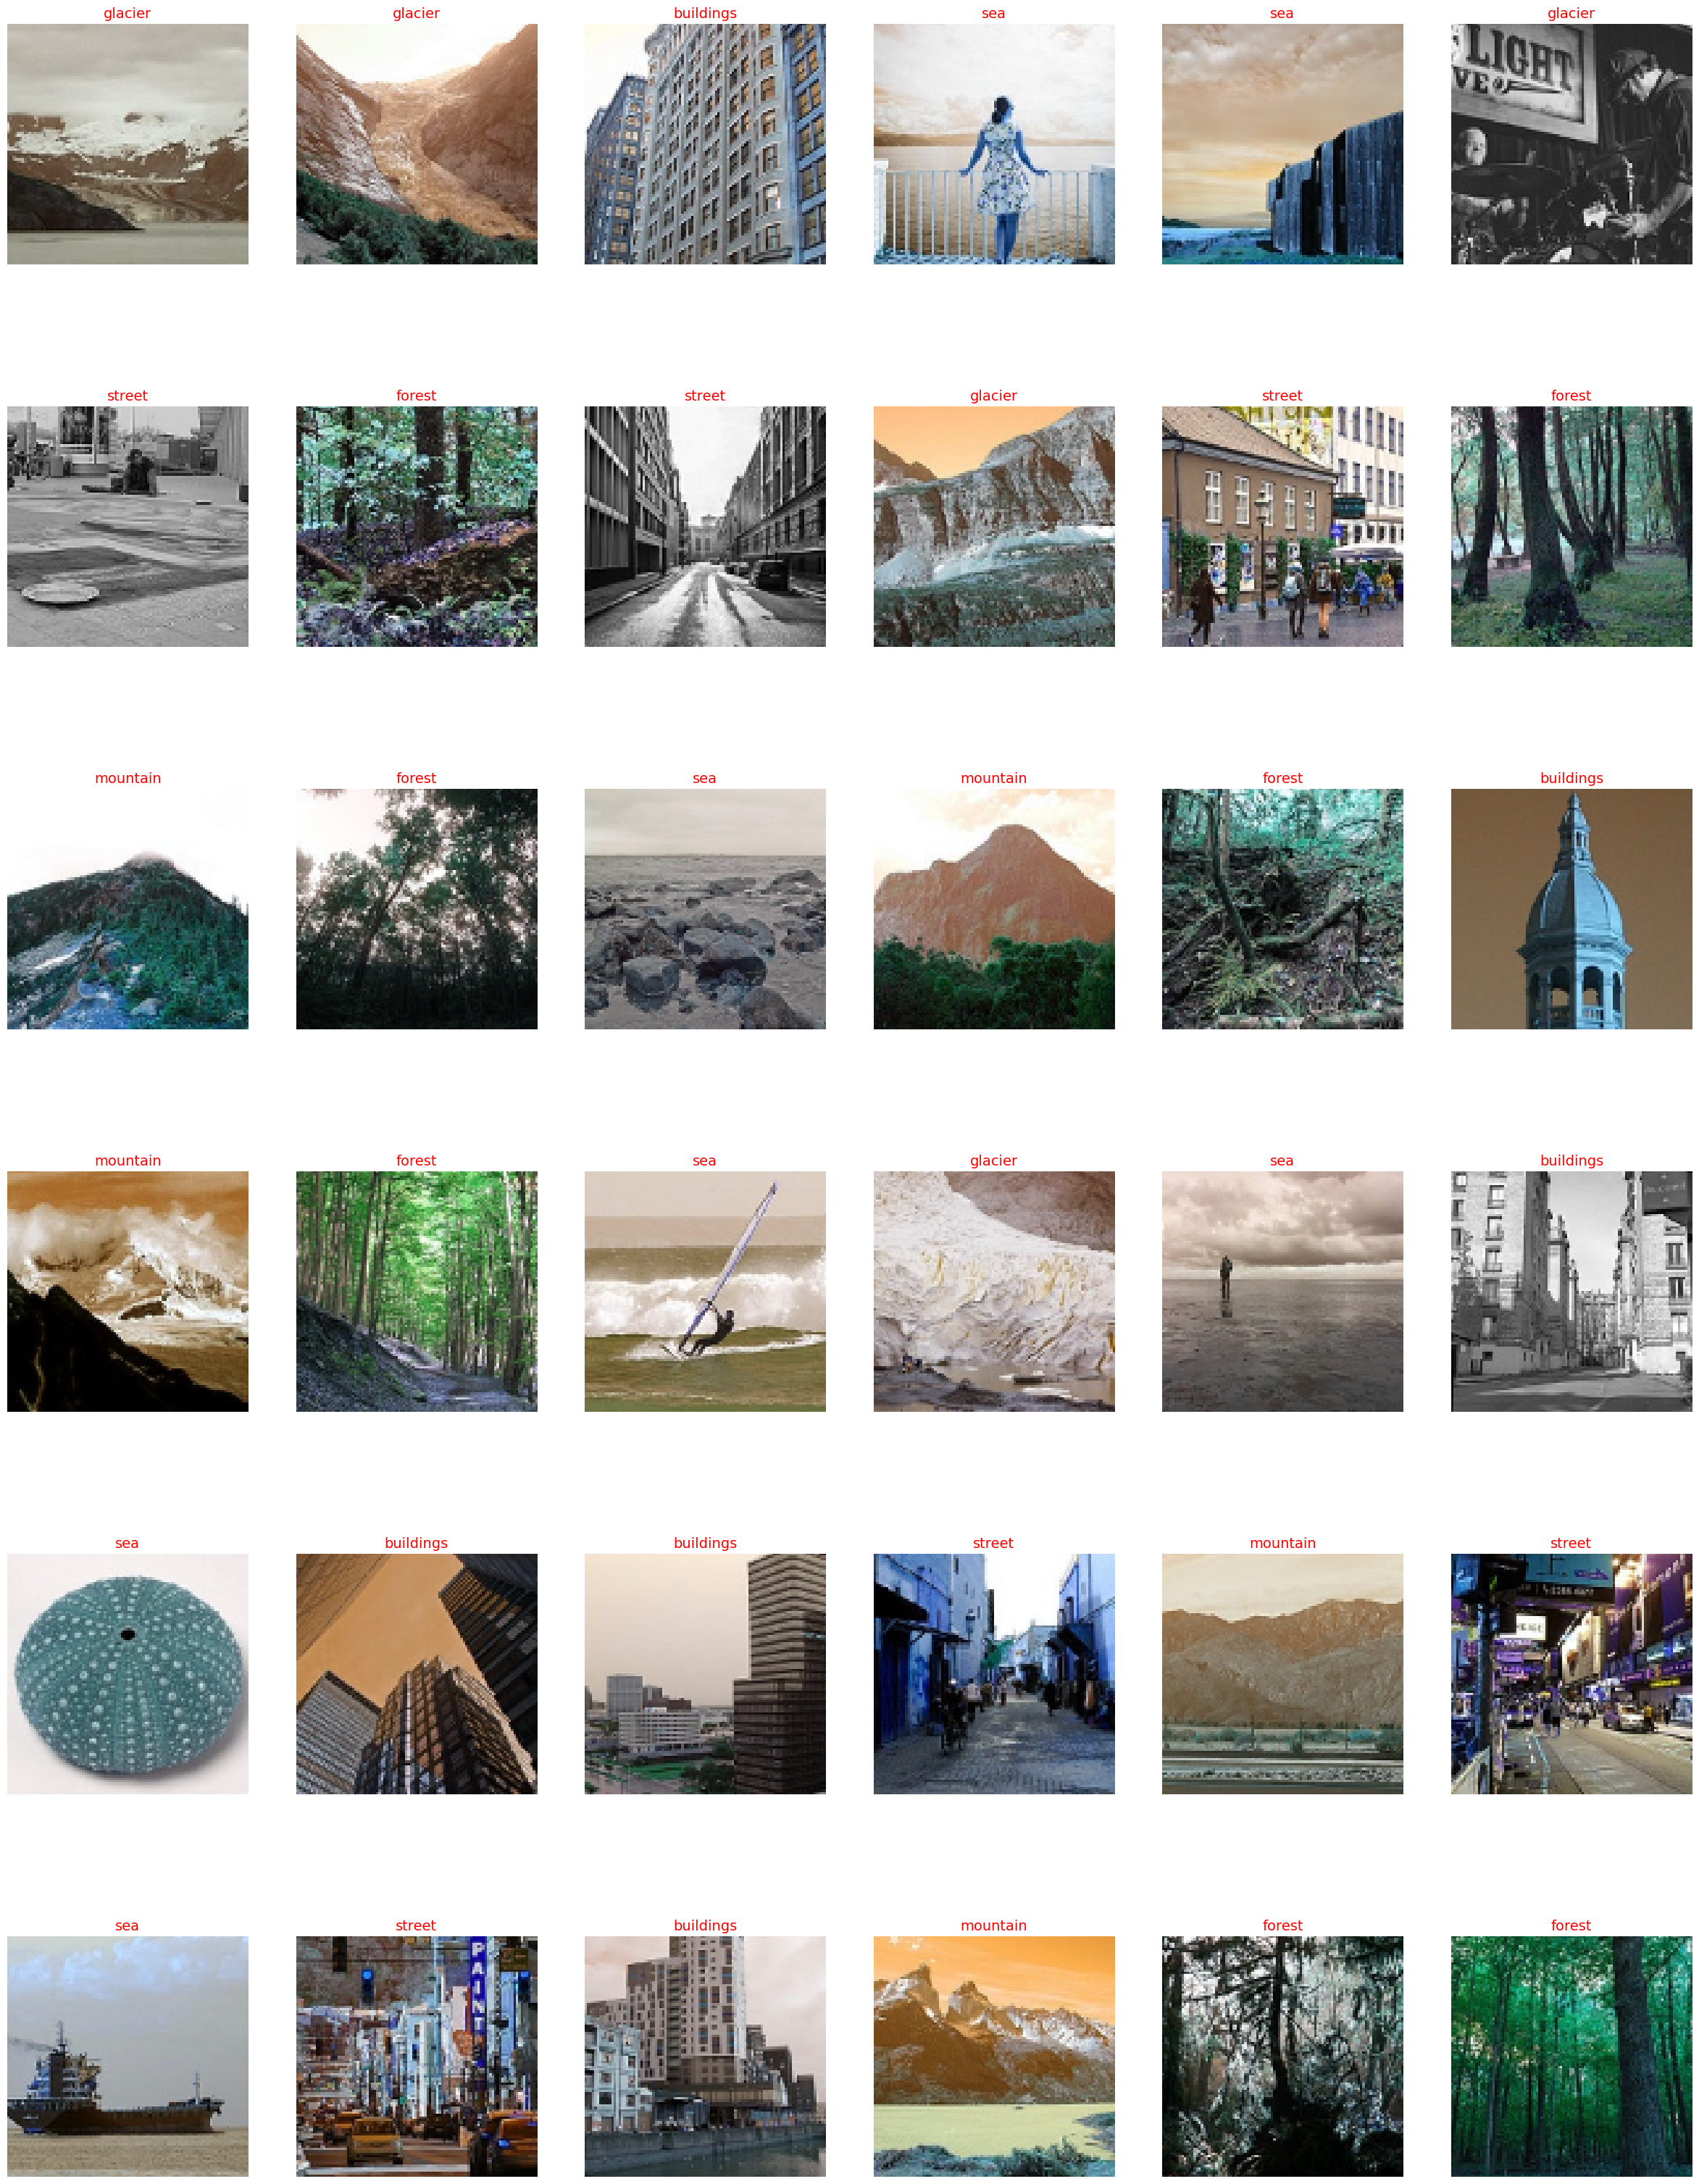

In [ ]:
plot_some_image(X_train, y_train, name = 'Traning')

**8. Images From Testing Folder**

----------------------------------------------------------------------------- Test Data -----------------------------------------------------------------------------


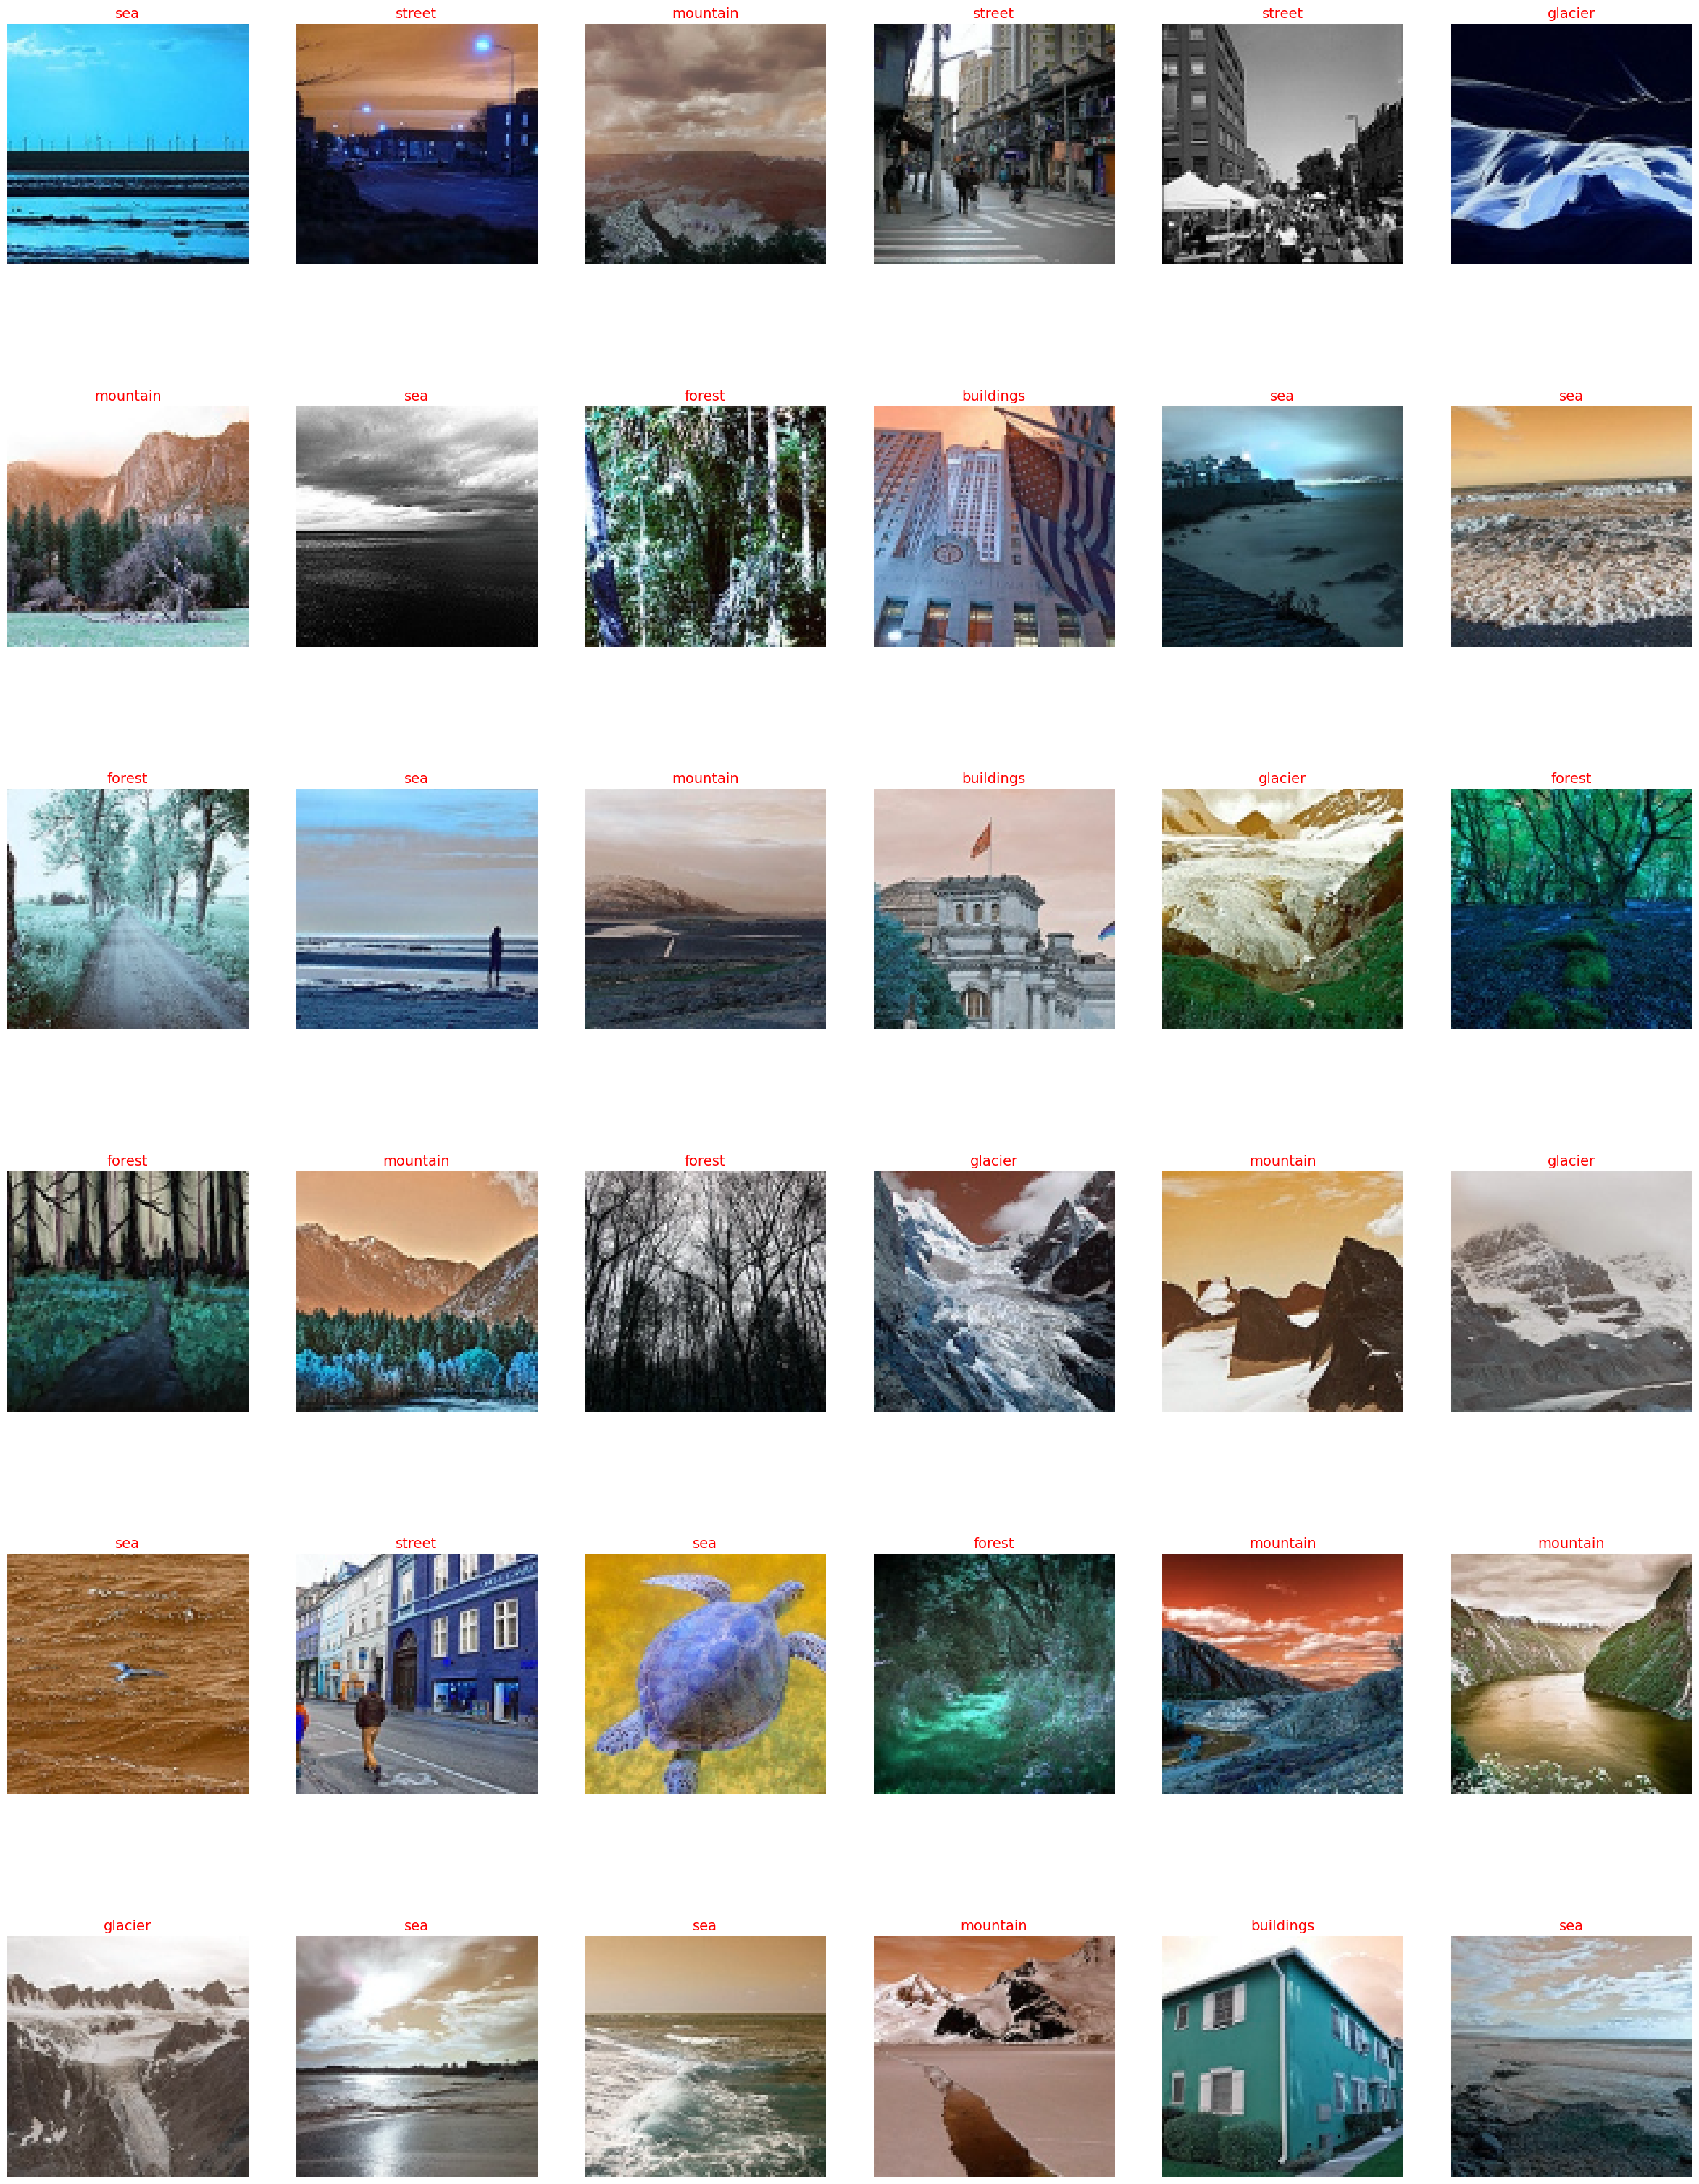

In [ ]:
plot_some_image(X_test, y_test, 'Test')

**8. Predction Folder Images**

----------------------------------------------------------------------------- Prediction Data -----------------------------------------------------------------------------


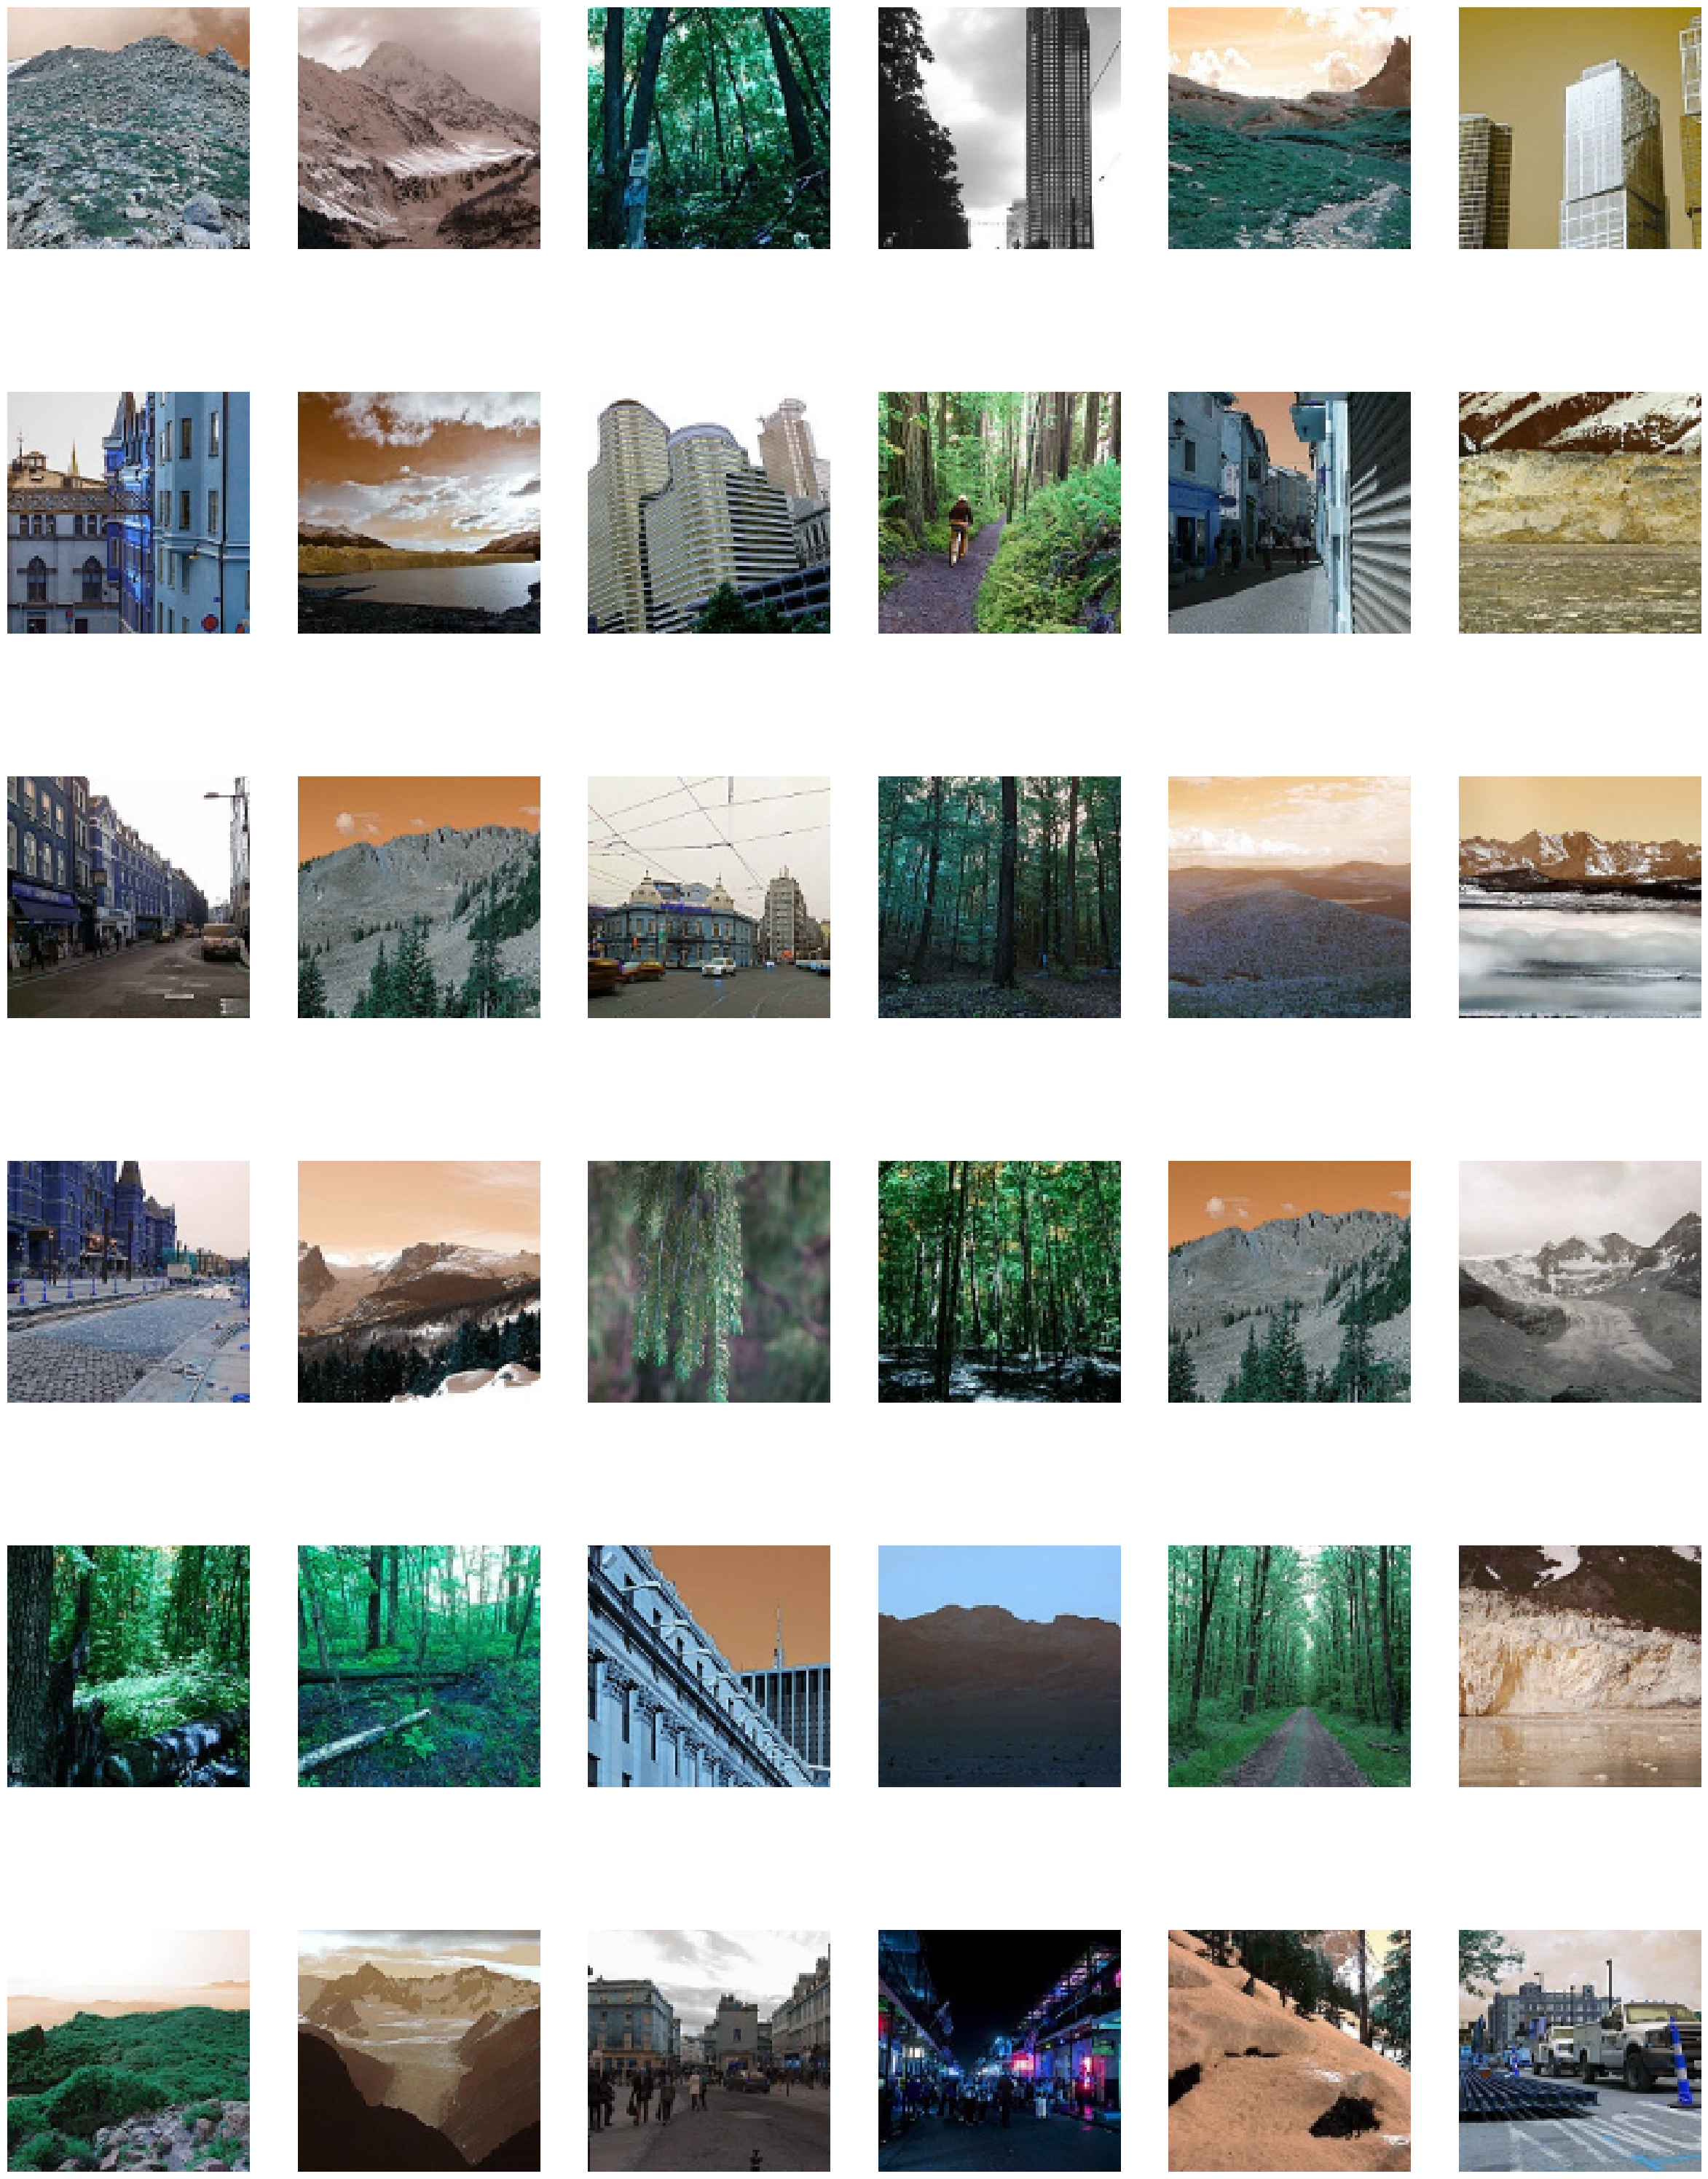

In [ ]:
plot_some_image(X_pred, None, 'Prediction')

**8. Converting Images to Arrays**

In [ ]:
# (number of picture, height, width, channel)
X_train, y_train = np.array(X_train) , np.array(y_train)
X_test, y_test = np.array(X_test) , np.array(y_test)
X_pred  = np.array(X_pred)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'X_pred shape  is {X_pred.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)
X_pred shape  is (7301, 100, 100, 3)


# 3. Model Implementation

**1. Defining Model **

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size = (3, 3), activation='relu', input_shape = (100, 100, 3)), # feature map -> (98, 98, 256)
    keras.layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu'), # feature map -> (96, 96, 128)
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(3, 3), # feature map -> (32, 32, 128)
    keras.layers.Conv2D(64, kernel_size = (3, 3), activation='relu'), # feature map -> (30, 30, 64)
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation= 'relu'),  # feature map -> (28, 28, 32)
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'), # feature map -> (26, 26, 16)
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(3, 3),  # feature map -> (8, 8, 16)

    keras.layers.Flatten(),  # 1024
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(6, activation='softmax')
])

print(model.summary())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96, 96, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,398 (2.07 MB)

 Trainable params: 541,110 (2.06 MB)

 Non-trainable params: 288 (1.12 KB)

None


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 25, batch_size=64, verbose=1)

Epoch 1/25


I0000 00:00:1728648608.154162      68 service.cc:145] XLA service 0x7aae1c016e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728648608.154223      68 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/220 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.1719 - loss: 3.0227 

I0000 00:00:1728648621.007948      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


220/220 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - accuracy: 0.5336 - loss: 1.2247
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.7508 - loss: 0.6827
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.7912 - loss: 0.5590
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8132 - loss: 0.5053
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8413 - loss: 0.4367
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.8548 - loss: 0.4121
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8718 - loss: 0.3498
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8807 - loss: 0.3215
Epoch 9/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9018 - loss: 0.2712
Epoch 10/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9162 - loss: 0.2284
Epoch 11/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9274 - loss: 0.2081
Epoch 12/25
220/220 ━━━━━━━━━━━━━━━━━━━━

**2. Evaluating Model**

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss is {}'.format(loss))
print('Test Accuracy is {}'.format(accuracy ))

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7522 - loss: 1.2967
Test Loss is 1.0019057989120483
Test Accuracy is 0.8023333549499512


In [ ]:
y_test_pred = model.predict(X_test)
print(f'Prediction Shape is {y_test_pred.shape}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Prediction Shape is (3000, 6)


**3.Results**

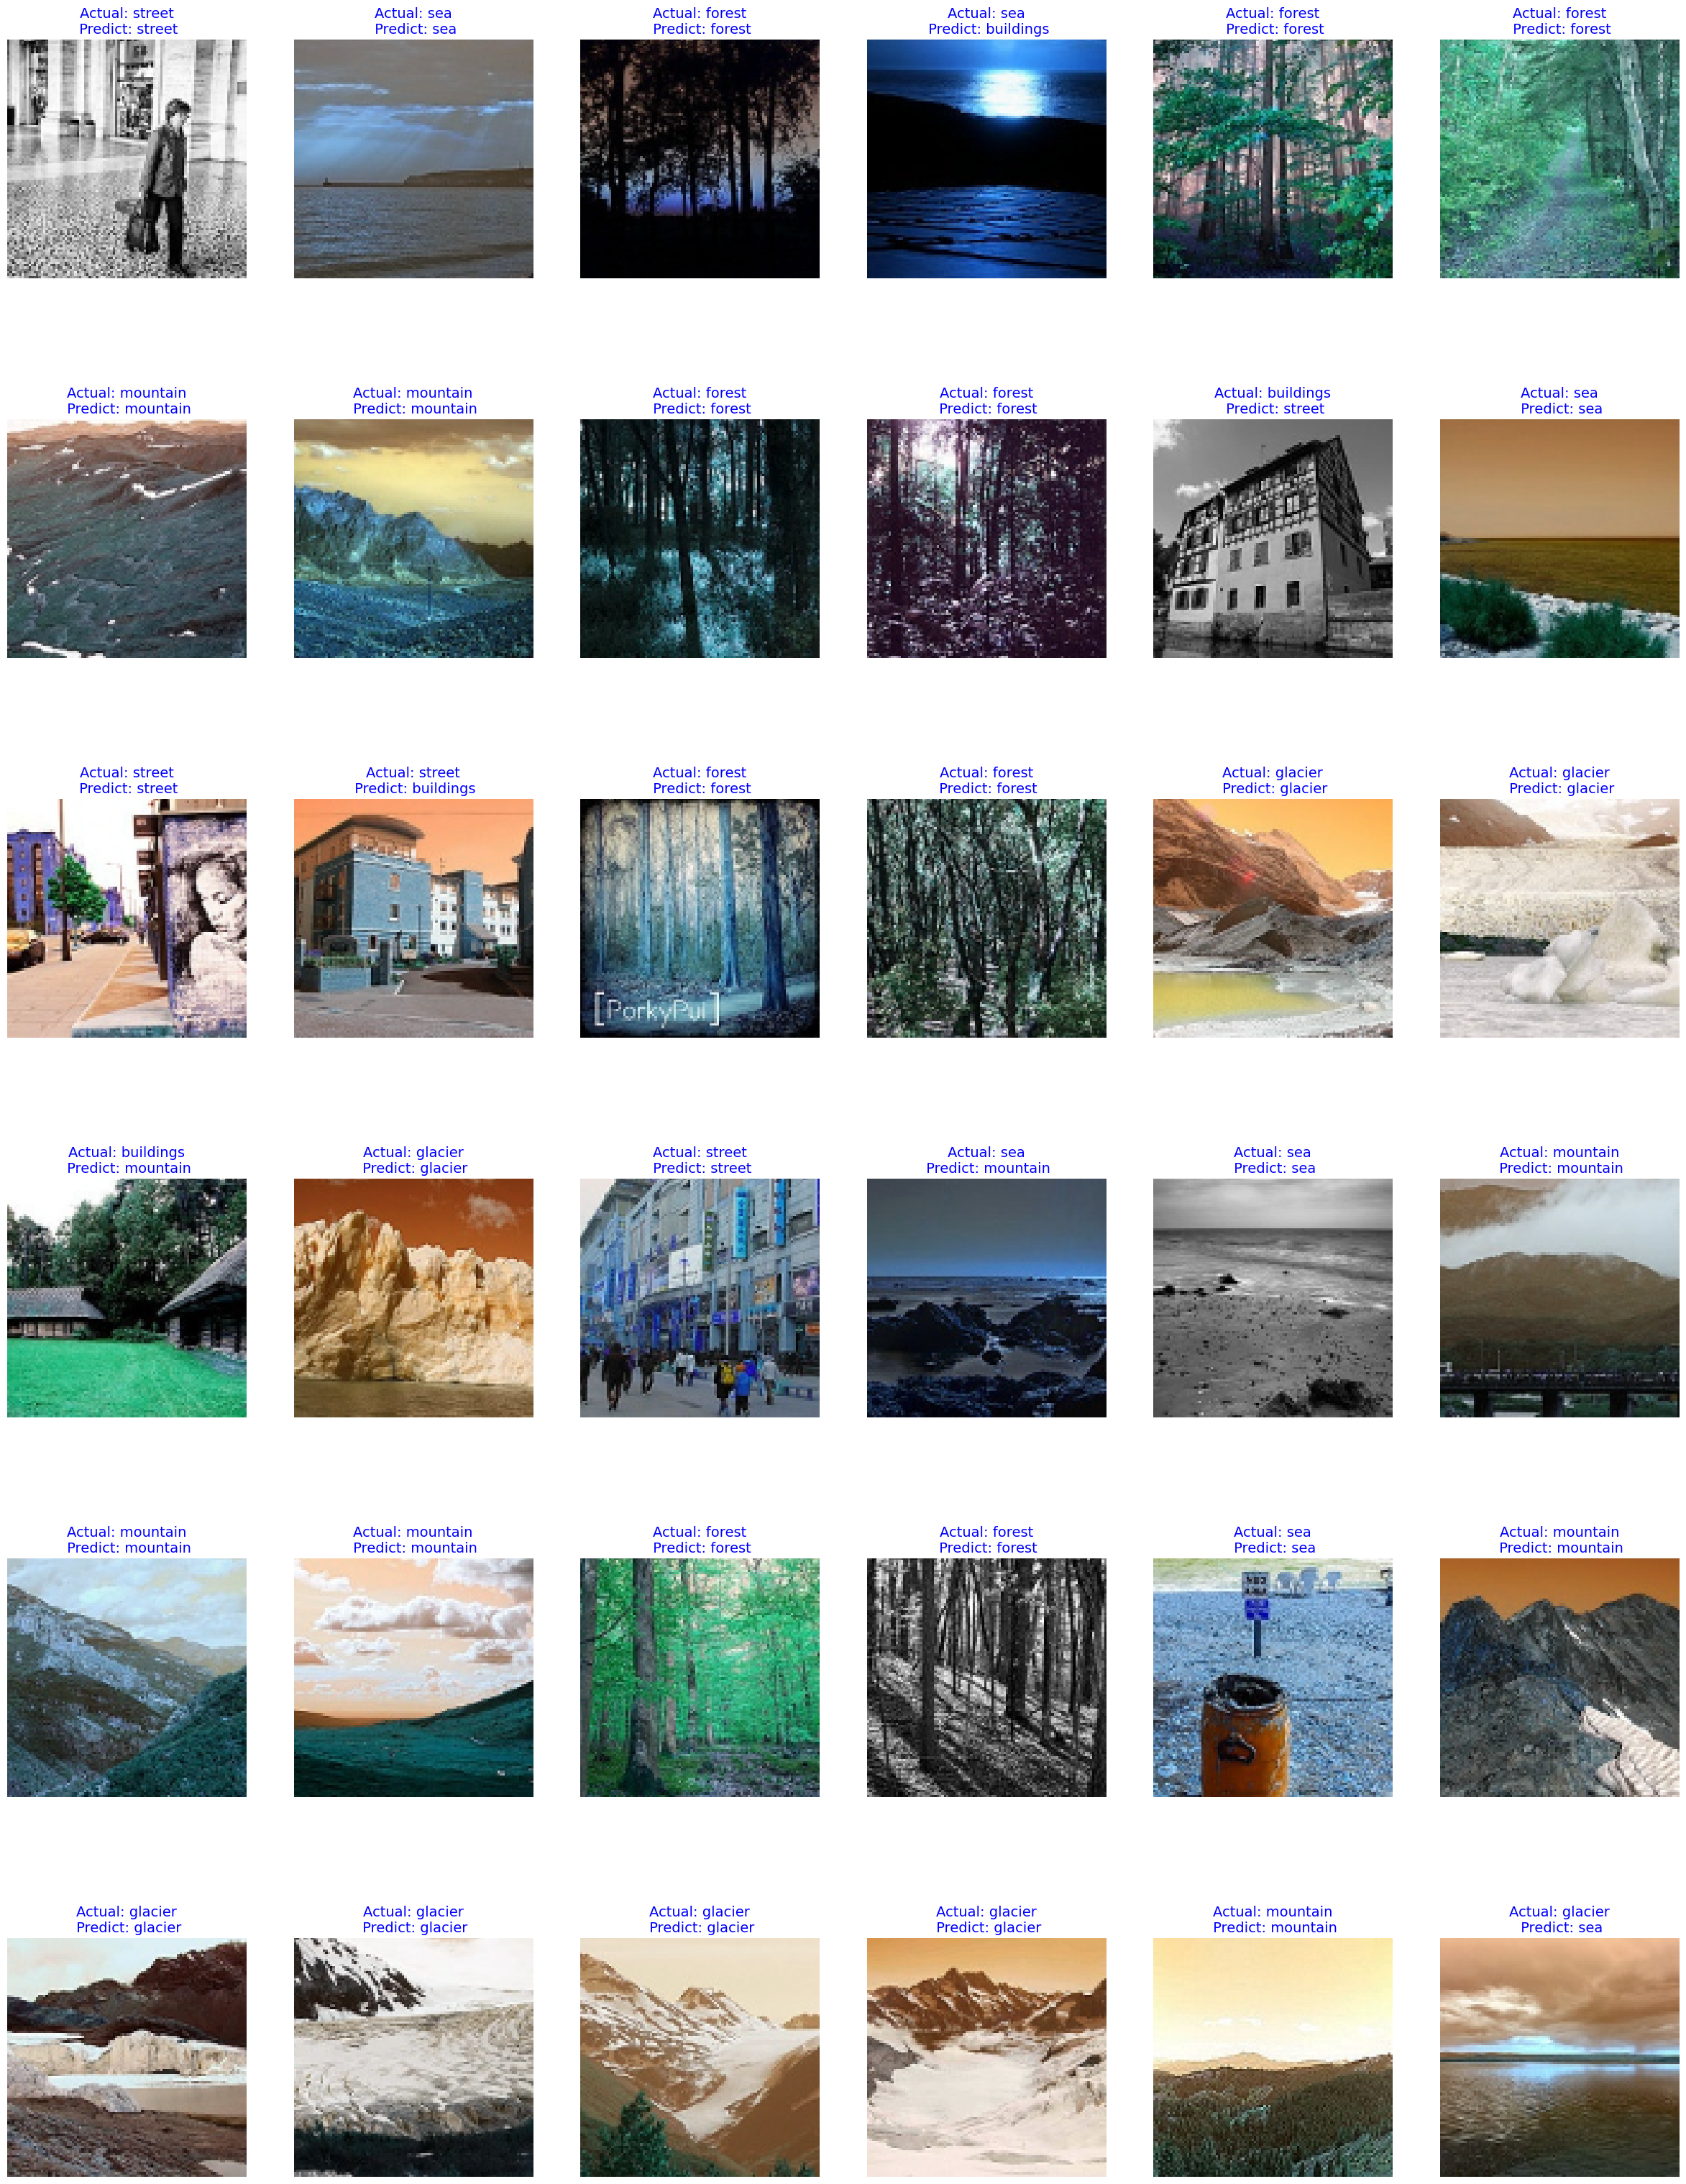

In [ ]:
plt.figure(figsize = (30, 40))
for n, i in enumerate(list(np.random.randint(0, len(X_test), 36))):
    plt.subplot(6, 6, n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f'Actual: {get_name(y_test[i])}\n Predict: {get_name(np.argmax(y_test_pred[i]))}', fontdict = {'fontsize': 14, 'color': 'blue'})

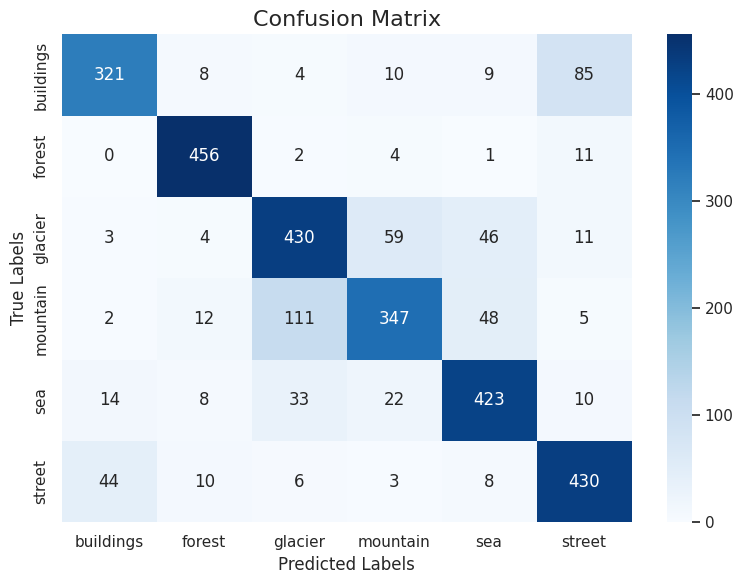

In [ ]:
def plot_confusion_matrix(true_labels, pred_labels, class_names):

    cm = confusion_matrix(true_labels, pred_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.tight_layout()
    plt.show()

class_names = ['buildings','forest','glacier','mountain','sea','street' ]
pred_labels = np.argmax(y_test_pred, axis=1)
plot_confusion_matrix(y_test, pred_labels, class_names)

<div style="font-size: 18px; color: #333; padding: 20px; background-color: #f9f9f9; border-left: 5px solid #4A90E2; border-radius: 8px; line-height: 1.6;">
  The model experiences confusion between different categories, including <strong>buildings and streets</strong>, <strong>glacier</strong>, and <strong>mountains</strong>. This overlap in features makes accurate classification challenging.
</div>

<div style="text-align: center; font-size: 24px; font-weight: bold; color: #FFFFFF; padding: 20px; background-color: #4A90E2; border-radius: 10px;">
  Predict Data
</div>


229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


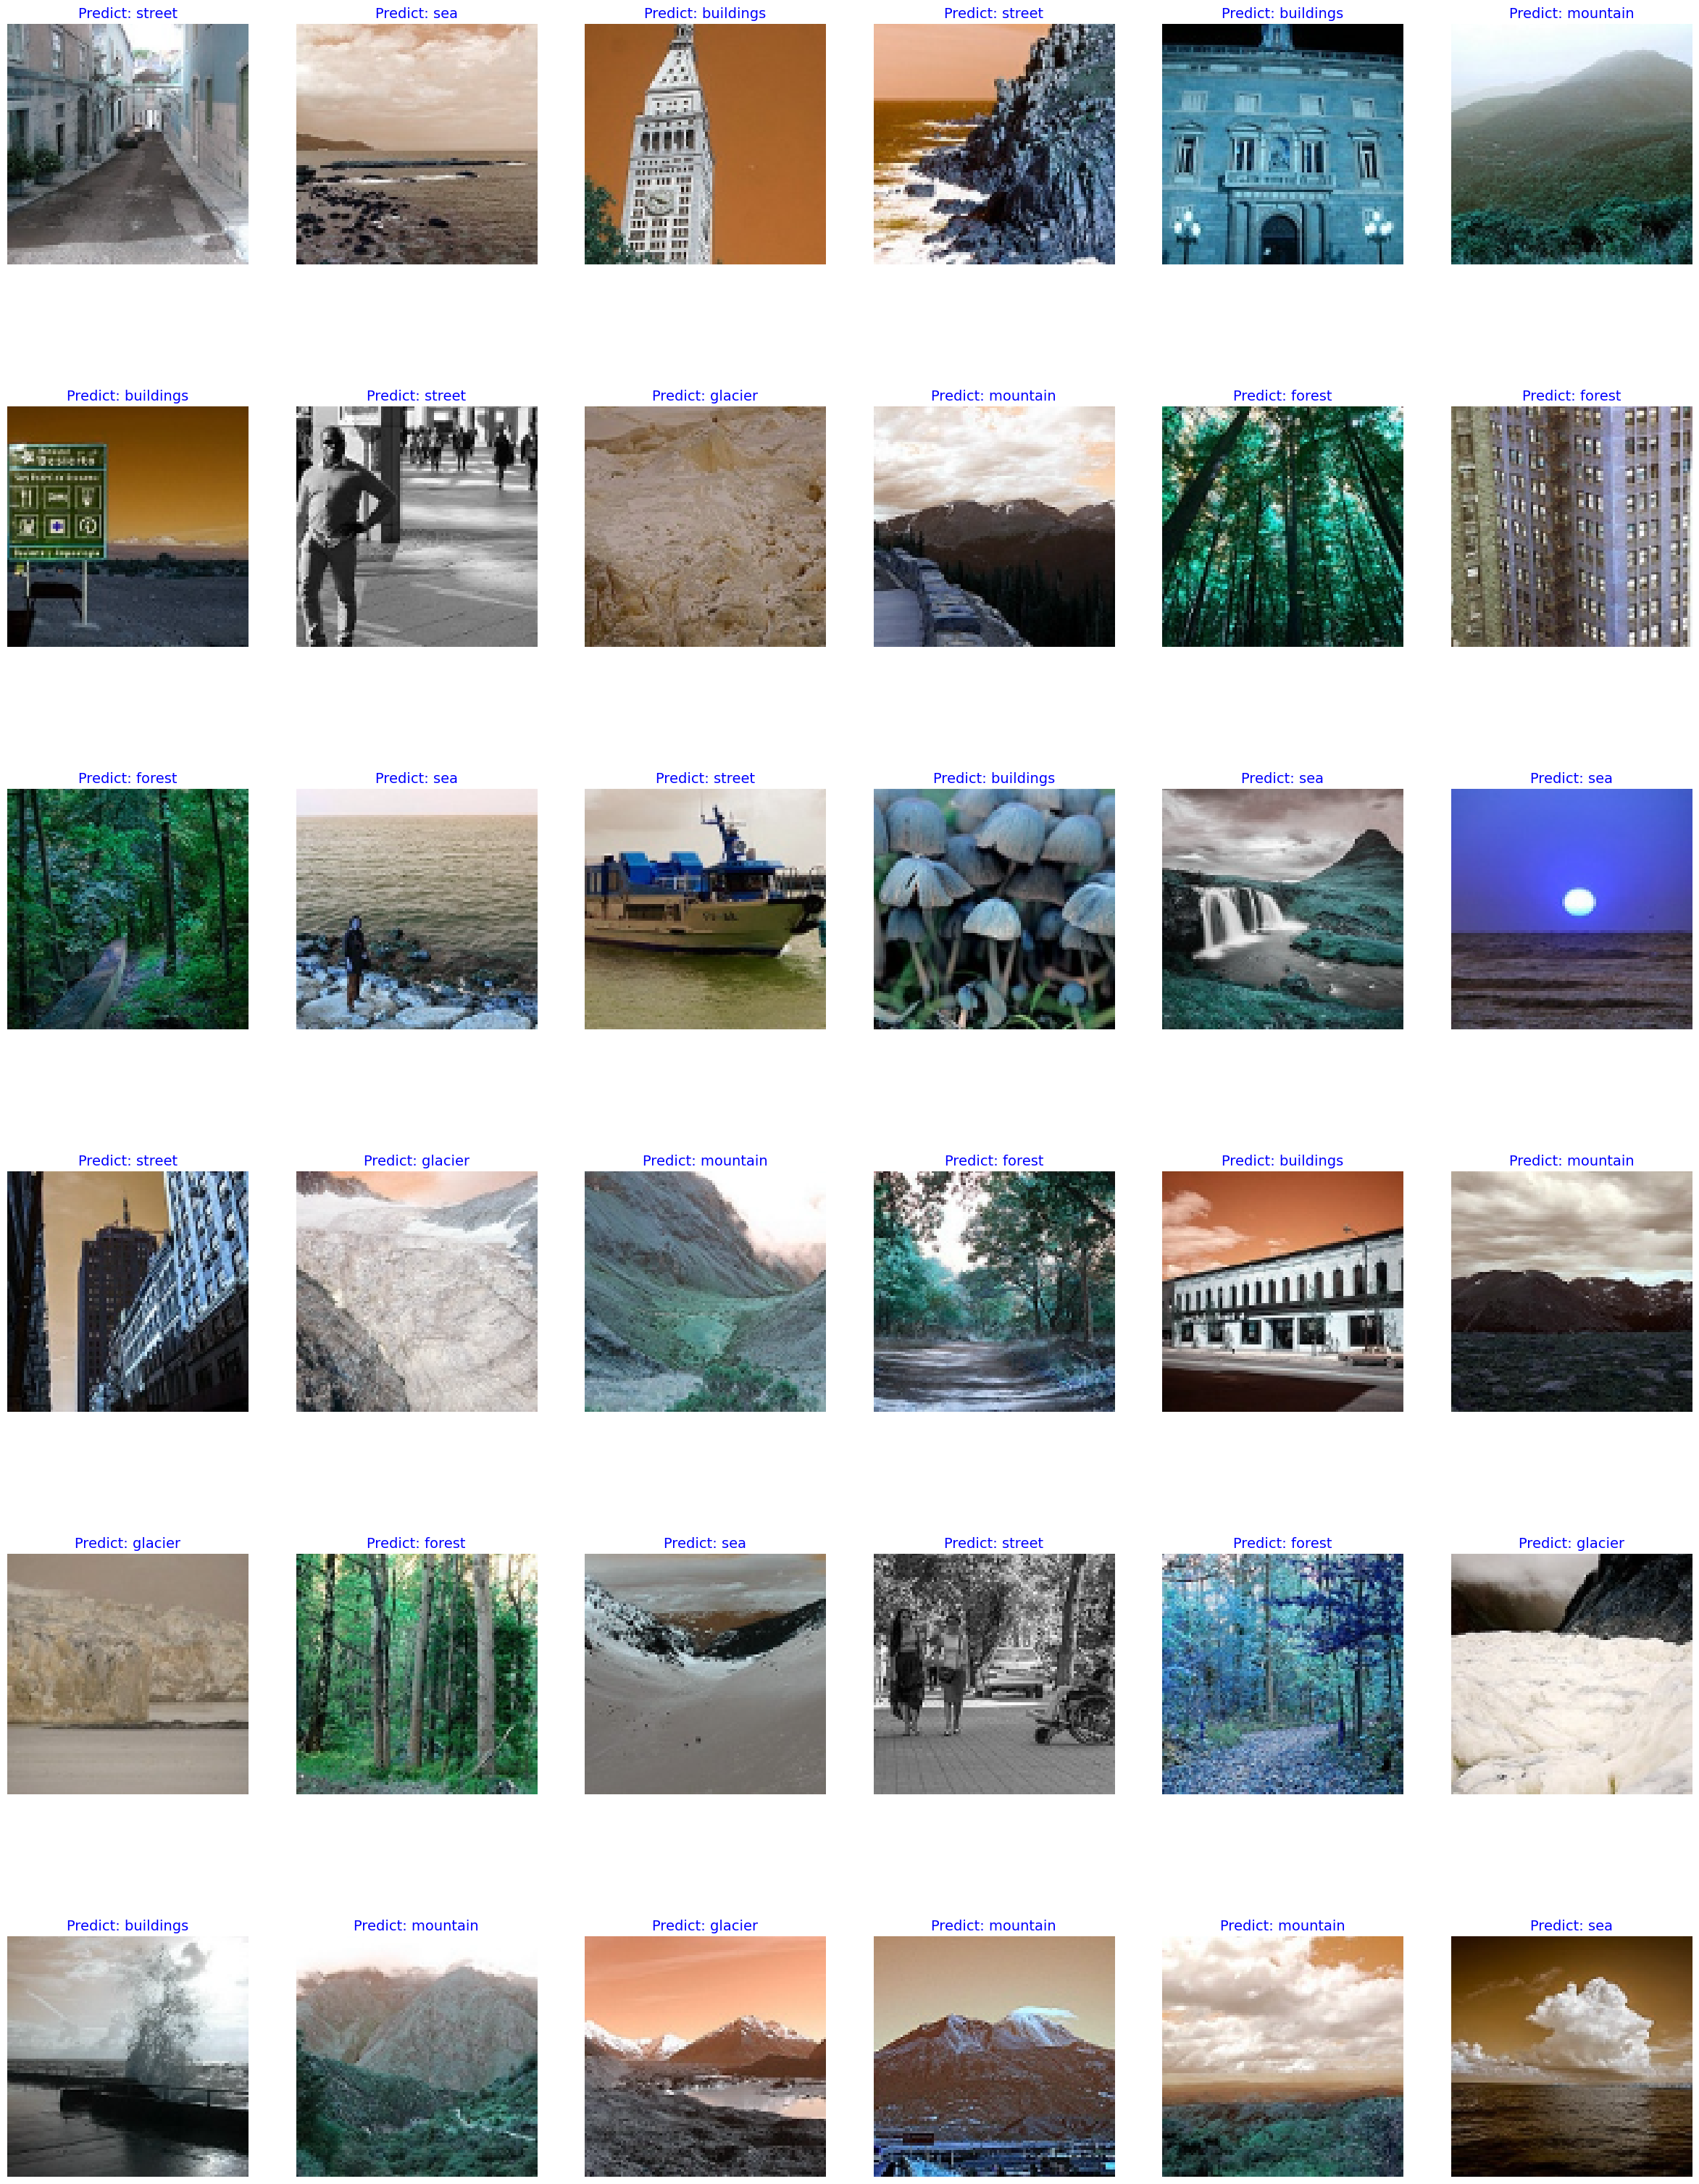

In [ ]:
y_pred = model.predict(X_pred)
plt.figure(figsize = (30, 40))
for n, i in enumerate(list(np.random.randint(0, len(X_pred), 36))):
    plt.subplot(6, 6, n+1)
    plt.imshow(X_pred[i])
    plt.axis('off')
    plt.title(f'Predict: {get_name(np.argmax(y_pred[i]))}', fontdict = {'fontsize': 14, 'color': 'blue'})